In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters
from matplotlib import pyplot as plt




In [2]:
img1 = "5076506.jpg"
img2 = "80184044.jpg"
img3 = "145215893.jpg"
img4 = "21852937.jpg"
img5 = "11474376103.jpg"
img6 = "10715577856.jpg"
img7 = "154740129.jpg"


In [55]:
img = imgs[8]

(768, 1024, 3)


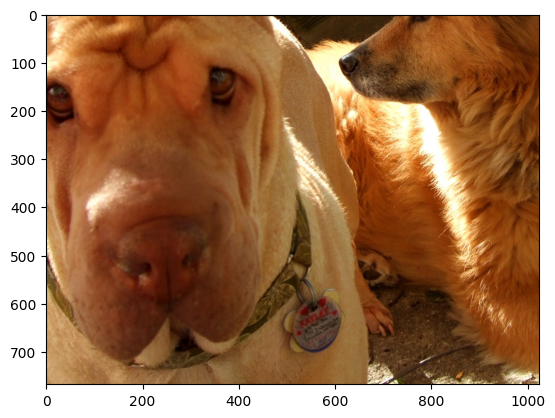

In [56]:
def open_image(img):
    im = Image.open('../../sample_data/1024x768/'+img)
    imArray = np.array(im)
    return imArray
#im.putalpha(255)
m = open_image(img)

#m = np.delete(m,1, 2)
#m = np.delete(m,1, 2)
print (m.shape)
w = m.shape[0]
h = m.shape[1]
#m = m.reshape(w,h)
plt.imshow(m,  vmin=0, vmax=255)


(768, 1024, 3)


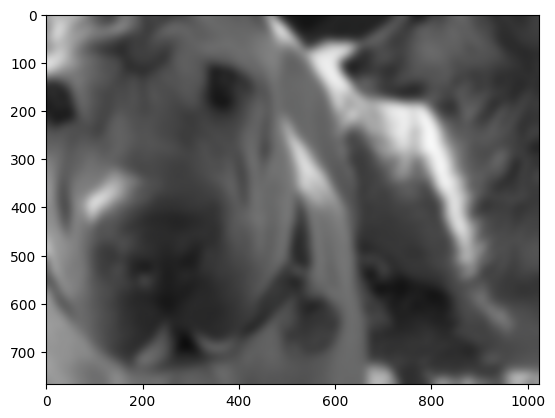

In [60]:
blurimg = scipy.ndimage.gaussian_filter(m,10)
print (blurimg.shape)
plt.imshow(blurimg)

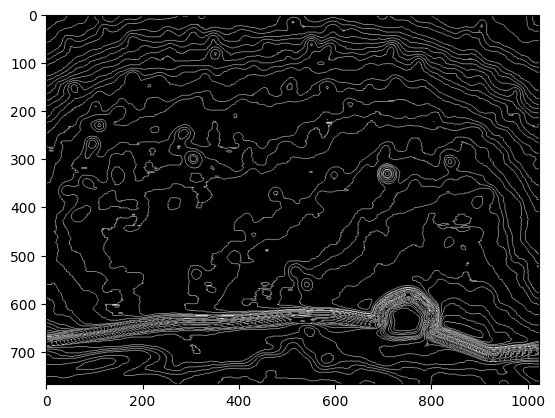

In [54]:

blur = scipy.ndimage.gaussian_filter(m,10)
laplacian = scipy.ndimage.laplace(blur)
plt.imshow(laplacian, vmin=0, vmax=255)


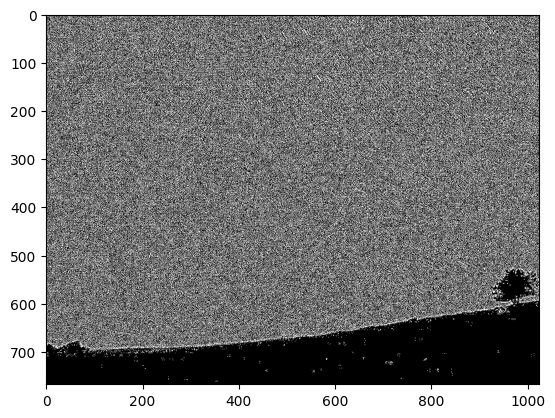

In [9]:
blur = scipy.ndimage.gaussian_filter(m[:,:,0],0)
laplacian = scipy.ndimage.laplace(blur)
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)

In [5]:
imgs = ["5076506.jpg",
    "80184044.jpg",
    "145215893.jpg",
    "21852937.jpg",
    "11474376103.jpg",
    "10715577856.jpg",
    "154740129.jpg",
    "1682888994.jpg",
    "1814122396.jpg",
       "1306121832.jpg",
       "1490095554.jpg",
        "228617373.jpg",
       "6034305010.jpg"]

In [369]:
imArray = open_image(img)

In [48]:
res0 = []
res2 = []
res10 = []

for i in range(len(imgs)):
    imArray = open_image(imgs[i])
    edge = edge_simplicity(imArray,2,0)
    edge2 = edge_simplicity(imArray,2,1)
    edge10 = edge_simplicity(imArray,2,10)
    res0.append(edge)
    res2.append(edge2)
    res10.append(edge10)
    print (i, edge, "  ", edge2, "  ", edge10)
    
res = np.array(res0)
print ("res", res.mean(), res.std())
res = np.array(res2)
print ("res2", res.mean(), res.std())
res = np.array(res10)
print ("res10", res.mean(), res.std())



0 1.1164347330729165    1.1157989501953125    1.110712687174479
1 1.1151631673177083    1.1157989501953125    1.1119842529296875
2 1.117070515950521    1.1151631673177083    1.109441121419271
3 1.1151631673177083    1.1164347330729165    1.1094411214192708
4 1.117706298828125    1.1157989501953125    1.1145273844401042
5 1.1164347330729165    1.1151631673177083    1.10626220703125
6 1.1157989501953125    1.117706298828125    1.1157989501953125
7 1.1164347330729165    1.117070515950521    1.1164347330729165
8 1.117706298828125    1.117706298828125    1.1151631673177083
9 1.1164347330729167    1.1151631673177083    1.1119842529296875
10 1.1157989501953125    1.1157989501953125    1.0992685953776042
11 1.117070515950521    1.1151631673177083    1.1119842529296875
12 1.0649363199869792    1.0630289713541667    1.07574462890625
res 1.1124733166816907 0.013745388849183023
res2 1.1119842529296875 0.01415955699368798
res10 1.1083651811648638 0.010388432466439845


In [30]:
from sklearn.preprocessing import StandardScaler

In [49]:
s = [[u] for u in res10]
scaler = StandardScaler()
scaler.fit(s)
print (scaler.mean_)
scaler.transform(s)

[1.10836518]


array([[ 0.22597307],
       [ 0.34837515],
       [ 0.10357099],
       [ 0.10357099],
       [ 0.59317932],
       [-0.20243421],
       [ 0.7155814 ],
       [ 0.77678244],
       [ 0.65438036],
       [ 0.34837515],
       [-0.87564566],
       [ 0.34837515],
       [-3.14008416]])

In [21]:

def edge_simplicity(imArray,idx,blur):
    blur = scipy.ndimage.gaussian_filter(imArray,blur)
    laplacian = scipy.ndimage.laplace(blur)
    #laplacian = scipy.ndimage.laplace(imArray[:, :, idx])
    
    
    totalSum = laplacian.sum()
    sumRows = laplacian.sum(axis=1) / totalSum
    sumRows = sumRows.sum(axis=1)
    sumColumns = laplacian.sum(axis=0) / totalSum
    sumColumns = sumColumns.sum(axis=1)
    f1 = hist_width(sumColumns, 0.98) / len(sumRows)
    f2 = hist_width(sumRows, 0.98) / len(sumColumns)
    return 1000*(f1 + f2) / 2



In [44]:
def sum_axis(laplacian):
    sumR = []
    total = 0
    check = 0
    i = 0
    for row in laplacian:
        for pixel in row:
            total += pixel
        
    for row in laplacian:
        sumR.append(0)
        for pixel in row:
            check += pixel/total
            sumR[i] += pixel/total
        i+=1

    print (total)
    print (sumR[599:609])
    print (check)
    return sumR

In [53]:
sumCollumns = sum_axis(laplacian)
sumRows = sum_axis(laplacian.T)

49252096
[0.0006986098622076914, 0.0007834387393381191, 0.0008429082896289331, 0.0008179753405824602, 0.0007331261597475975, 0.0006936151509166231, 0.0007085383736765235, 0.0007481102936208041, 0.000672377476077363, 0.0006699410315451344]
0.9999999999998653
49252096
[0.0012042939248717447, 0.0012212881254840399, 0.0011613515899912164, 0.0010864918317384908, 0.0010342910076354922, 0.0010090738067269265, 0.0011776554646527138, 0.0012428303558898288, 0.001196152139393215, 0.0010839741723885213]
0.9999999999998791


In [54]:
f1 = min_range95(sumCollumns,w)
f2 = min_range95(sumRows,h)
print(f1)
print(f2)

MIN: 1560
Feature: 0.8464460119370592
MIN: 966
Feature: 0.615678776290631
0.8464460119370592
0.615678776290631


In [ ]:
f = []
res = []
for i in range(size[1]):
  f.append(0)
  res.append(10000)
  for j in range(i,size[1]):
    f[i] += sumR[j]
    if f[i] > 0.90:
      res[i] = j - i
      break
print (res)
print ("MIN:", min(res))
print ("Feature:", min(res)/size[1])

In [13]:

def hist_width(v, p):
    threshold = (1 - p) / 2
    leftsum = 0
    rightsum = 0
    l = len(v)
    end = l - 1
    start = 0
    left = 1
    right = 1
    for i in range(l):
        leftsum += v[i]
        
        rightsum += v[l - 1 - i]
        
        if (leftsum >= threshold) and left:
            start = i
            left = 0
        if (rightsum >= threshold) and right:
            end = l - 1 - i
            right = 0
        if (not left) and (not right):
            break
    if start > end:
        result = 0
    else:
        result = (end - start) / l
    return result


In [370]:
edge = edge_simplicity(imArray,0,50)
edge

1.1081695556640625

In [78]:
edge = edge_simplicity(imArray)
edge

/tmp/ipykernel_41/2599061189.py:2: DeprecationWarning: Please use `laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  laplacian = scipy.ndimage.filters.laplace(imArray[:, :, 0])


0.0010827382405598958